In [11]:
import pandas as pd
import numpy as np
import wordcloud
import re
import matplotlib.pyplot as plt
import os

%matplotlib inline

# Import Data

In [141]:
os.chdir('C:/Users/bryan/Desktop/DOSSIER')
data = pd.read_excel('Irish Press Analysis.xlsx')
data.head()

,source,headline,date,author,file_ref
0,Hot Press,By Hook Or By Crook,2015-09-30,Stuart Clark,mediabook1.txt
1,Irish Times,Dail to consider motion allowing defence to O'...,2015-09-30,Sarah Bardon,mediabook1.txt
2,Irish Independent,A gentleman of his word with a talent for ever...,2015-09-29,Nicola Anderson,mediabook1.txt
3,Irish Independent,Widow of Ryanair founder passes away after sho...,2015-09-29,Nicola Anderson,mediabook1.txt
4,Irish Independent,Digicel honoured for supporting Haiti's earthq...,2015-09-29,NaN,mediabook1.txt


# Clean Headlines

In [143]:
data['cleaned'] = data['headline'].replace(to_replace="[,.:;@#?!&$]+", value=r" ", regex=True)
data['cleaned'] = data['cleaned'].replace(to_replace="\s+", value=r" ", regex=True)
data['cleaned'] = data['cleaned'].str.lower()
data['cleaned'] = data['cleaned'].str.replace(pat = "'s", repl ="")
data.drop('file_ref',axis=1, inplace=True)
data.head()

,source,headline,date,author,cleaned
0,Hot Press,By Hook Or By Crook,2015-09-30,Stuart Clark,by hook or by crook
1,Irish Times,Dail to consider motion allowing defence to O'...,2015-09-30,Sarah Bardon,dail to consider motion allowing defence to o'...
2,Irish Independent,A gentleman of his word with a talent for ever...,2015-09-29,Nicola Anderson,a gentleman of his word with a talent for ever...
3,Irish Independent,Widow of Ryanair founder passes away after sho...,2015-09-29,Nicola Anderson,widow of ryanair founder passes away after sho...
4,Irish Independent,Digicel honoured for supporting Haiti's earthq...,2015-09-29,NaN,digicel honoured for supporting haiti earthqua...


# Create WordCloud

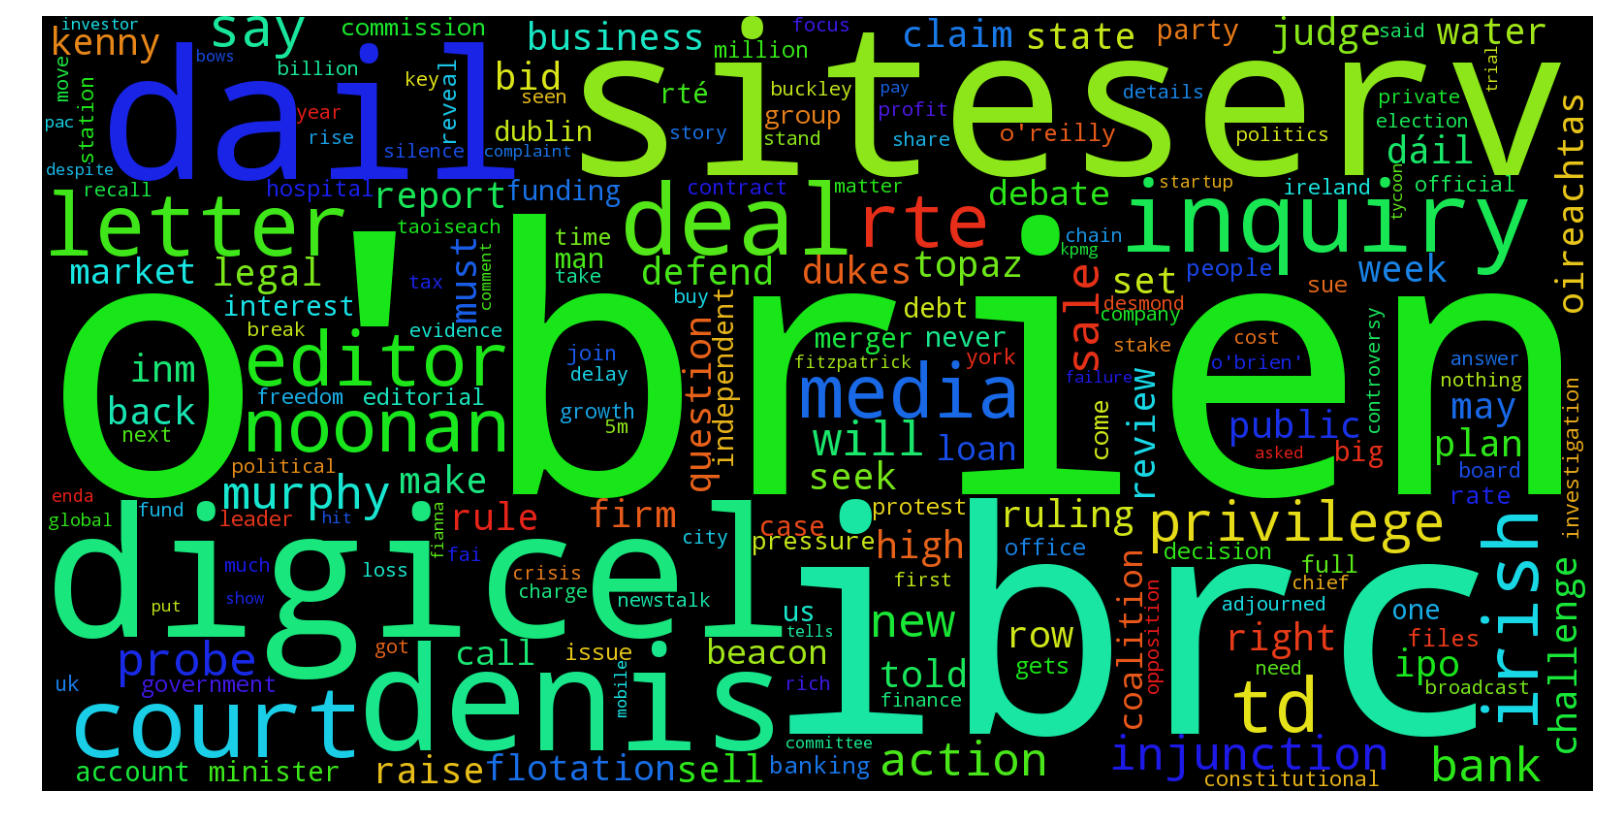

In [144]:
from wordcloud import WordCloud
text = data['cleaned'].str.cat(sep = ' ')
wordcloud = WordCloud(width=1600, height=800).generate(text)
plt.figure( figsize=(20,10))
plt.imshow(wordcloud)
plt.axis("off")
plt.savefig('wordcloud.png',bbox_inches='tight')

# Create keyword flags

In [146]:
data["Denis O'Brien"] = (data['cleaned'].str.contains("o'brien"))|(data['cleaned'].str.contains("o' brien"))|(data['cleaned'].str.contains("denis"))
data['Digicel'] = data['cleaned'].str.contains('digicel')
data['IBRC'] = data['cleaned'].str.contains('ibrc')
data['Siteserv'] = data['cleaned'].str.contains('siteserv')
data['Topaz'] = data['cleaned'].str.contains('topaz')
data['RTE'] = data['cleaned'].str.contains('rte')
data['Dail'] = data['cleaned'].str.contains('dail')
data['Minister'] = data['cleaned'].str.contains('minister')
data['Murphy'] = data['cleaned'].str.contains('murphy')
data['Noonan'] = data['cleaned'].str.contains('noonan')
data['Kenny'] = data['cleaned'].str.contains('kenny')
data['IPO/Float'] = (data['cleaned'].str.contains("flot"))|(data['cleaned'].str.contains('float'))|(data['cleaned'].str.contains('ipo'))
data['INM'] = (data['cleaned'].str.contains("inm"))|(data['cleaned'].str.contains('independent news and media'))
data['FAI'] = data['cleaned'].str.contains('fai')

# Keywords by Author

In [147]:
pd.set_option('precision', 0)
data.groupby('author').sum().sort_values("Denis O'Brien",ascending=False).head(20)

,Denis O'Brien,Digicel,IBRC,Siteserv,Topaz,RTE,Dail,Minister,Murphy,Noonan,Kenny,IPO/Float,INM,FAI
author,,,,,,,,,,,,,,
Mark Paul,21,13,3,8,1,5,2,0,0,3,0,3,0,0
Philip Ryan,12,0,5,2,0,2,6,1,4,5,0,0,0,2
Tim Healy,10,0,1,0,0,11,0,0,0,0,0,0,0,0
Tom Lyons,10,0,5,2,1,1,0,0,0,3,0,0,1,0
Shaun Connolly,8,0,4,3,0,0,1,0,2,2,2,0,0,1
Sarah Bardon,7,0,0,0,0,0,3,0,0,0,0,0,0,0
Ann O'Loughlin,5,0,1,0,0,0,0,0,0,0,0,0,0,0
Ian Guider,4,4,1,1,1,0,1,0,0,0,0,3,0,0
John Downing,4,0,6,3,0,2,3,1,0,6,2,0,0,0


# Keywords by Publication

In [148]:
data.groupby('source').sum().sort_values("Denis O'Brien",ascending=False).head(10)

,Denis O'Brien,Digicel,IBRC,Siteserv,Topaz,RTE,Dail,Minister,Murphy,Noonan,Kenny,IPO/Float,INM,FAI
source,,,,,,,,,,,,,,
Irish Times,45,4,17,18,1,7,15,5,4,6,2,5,0,5
Irish Independent,34,11,18,13,1,14,13,3,5,12,3,1,2,2
Irish Examiner,30,3,22,12,1,0,1,1,3,6,2,3,1,4
Sunday Business Post,28,8,8,3,5,1,3,0,2,3,0,4,2,1
Irish Times Business,21,19,4,3,4,4,1,0,0,0,1,7,1,0
The Phoenix,9,0,0,3,1,1,1,0,2,2,2,0,3,0
The Herald,8,0,2,2,0,2,6,0,0,1,0,0,1,1
Sunday Independent,5,0,6,1,0,0,3,0,1,1,1,0,0,0
Village,5,0,0,2,0,1,1,0,0,0,0,0,0,1


# Keyword Trends

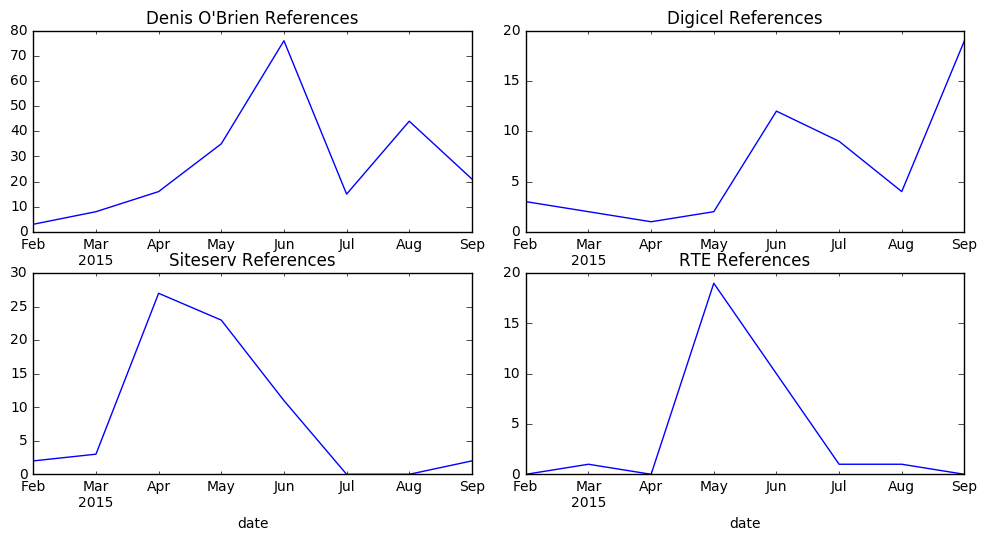

In [150]:
fig, axs = plt.subplots(2,2,figsize=(10, 5))
plt.tight_layout()
denis = data[['date',"Denis O'Brien"]]
denis = denis.set_index('date')
digi = data[['date','Digicel']]
digi = digi.set_index('date')
ss = data[['date','Siteserv']]
ss = ss.set_index('date')
rte = data[['date','RTE']]
rte = rte.set_index('date')

denis_plot = denis.resample('M',how=sum).plot(ax=axs[0,0],title="Denis O'Brien References",legend=None)
digi_plot = digi.resample('M',how=sum).plot(ax=axs[0,1],title="Digicel References",legend=None)
ss_plot = ss.resample('M',how=sum).plot(ax=axs[1,0],title="Siteserv References",legend=None)
rte_plot = rte.resample('M',how=sum).plot(ax=axs[1,1],title="RTE References",legend=None)

import warnings

def fxn():
    warnings.warn("deprecated", DeprecationWarning)

with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    fxn()